In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [4]:
# Load dataset
df = pd.read_csv('IMDB Dataset.csv')

# Check for null values and dataset info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Convert sentiments to binary
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower().split()  # Convert to lowercase and split words
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    return ' '.join(text)

# Apply cleaning
df['review'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['review'])

# Pad sequences
max_len = 200
X = pad_sequences(sequences, maxlen=max_len)

# Target variable
y = df['sentiment'].values


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Explicitly build the model with the input shape
model.build(input_shape=(None, max_len))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 200, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 821,057 (3.13 MB)

 Trainable params: 821,057 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, y_train, epochs=7, batch_size=64, validation_split=0.2)


Epoch 1/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.7870 - loss: 0.4487 - val_accuracy: 0.8719 - val_loss: 0.3136
Epoch 2/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9027 - loss: 0.2475 - val_accuracy: 0.8751 - val_loss: 0.3010
Epoch 3/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9221 - loss: 0.2071 - val_accuracy: 0.8744 - val_loss: 0.3193
Epoch 4/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9396 - loss: 0.1611 - val_accuracy: 0.8692 - val_loss: 0.3396
Epoch 5/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9506 - loss: 0.1385 - val_accuracy: 0.8622 - val_loss: 0.3912
Epoch 6/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9690 - loss: 0.0932 - val_accuracy: 0.8611 - val_loss: 0.4425
Epoch 7/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9786 - loss: 0.0661 - val_accuracy: 0.8443 - val_loss: 0.5148


In [10]:
# Evaluate on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
Accuracy: 0.8485
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4961
           1       0.87      0.82      0.84      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [20]:
!pip install optuna-integration[tfkeras]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 4.1 MB/s eta 0:00:00


In [21]:
import optuna
from optuna.integration import TFKerasPruningCallback
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [22]:
def objective(trial):
    # Hyperparameter search space
    embedding_dim = trial.suggest_int("embedding_dim", 64, 256)
    lstm_units = trial.suggest_int("lstm_units", 32, 128)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)

    # Build the model
    model = Sequential([
        Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_len),
        LSTM(lstm_units, return_sequences=True),
        Dropout(dropout_rate),
        LSTM(lstm_units),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=5,  # Use fewer epochs for tuning
        batch_size=64,
        callbacks=[TFKerasPruningCallback(trial, "val_loss")],  # Optuna pruning
        verbose=0  # Suppress training output
    )

    # Return validation loss for optimization
    val_loss = history.history['val_loss'][-1]
    return val_loss


In [23]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)  # Set number of trials

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)


[I 2024-12-07 10:05:11,319] A new study created in memory with name: no-name-bb4a5078-15a7-4026-b338-421ac4d3addf
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
[I 2024-12-07 10:06:42,478] Trial 0 finished with value: 0.3319758176803589 and parameters: {'embedding_dim': 152, 'lstm_units': 101, 'dropout_rate': 0.3013220962429194, 'learning_rate': 0.00042242651872190646}. Best is trial 0 with value: 0.3319758176803589.
[I 2024-12-07 10:08:20,347] Trial 1 finished with value: 0.31525856256484985 and parameters: {'embedding_dim': 135, 'lstm_units': 100, 'dropout_rate': 0.38595953908797853, 'learning_rate': 0.00017151240283240688}. Best is trial 1 with value: 0.31525856256484985.
[I 2024-12-07 10:09:56,813] Trial 2 finished with value: 0.31526729464530945 and parameters: {'embedding_dim': 143, 'lstm_units': 89, 'dropout_rate': 0.30498888705059923, 'learning_rate': 0.004997077

Best hyperparameters: {'embedding_dim': 172, 'lstm_units': 122, 'dropout_rate': 0.17634458721155735, 'learning_rate': 0.0003041037469774213}


In [24]:
best_params = study.best_params

# Build and train the model with the best parameters
model_tuned = Sequential([
    Embedding(input_dim=5000, output_dim=best_params['embedding_dim'], input_length=max_len),
    LSTM(best_params['lstm_units'], return_sequences=True),
    Dropout(best_params['dropout_rate']),
    LSTM(best_params['lstm_units']),
    Dropout(best_params['dropout_rate']),
    Dense(1, activation='sigmoid')
])

model_tuned.compile(optimizer=Adam(learning_rate=best_params['learning_rate']),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

history_tuned = model_tuned.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,  # Train for more epochs with tuned parameters
    batch_size=64,
    verbose=1
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.7742 - loss: 0.4438 - val_accuracy: 0.8846 - val_loss: 0.2752
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9049 - loss: 0.2436 - val_accuracy: 0.8852 - val_loss: 0.2769
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9203 - loss: 0.2097 - val_accuracy: 0.8872 - val_loss: 0.2905
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9319 - loss: 0.1822 - val_accuracy: 0.8811 - val_loss: 0.3137
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9444 - loss: 0.1490 - val_accuracy: 0.8799 - val_loss: 0.3198
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9576 - loss: 0.1202 - val_accuracy: 0.8756 - val_loss: 0.3703
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9683 - loss: 0.0946 - val_accuracy: 0.8701 - val_loss: 0.4074
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9766 - loss: 0.0768 - 

In [25]:
# Evaluate on the test set
y_pred_tuned = (model_tuned.predict(X_test) > 0.5).astype("int32")
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("Tuned Model Accuracy:", accuracy_tuned)
print(classification_report(y_test, y_pred_tuned))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Tuned Model Accuracy: 0.8634
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.85      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



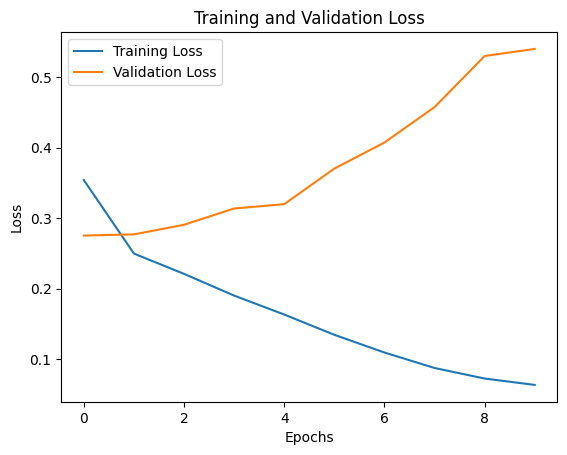

In [26]:
# Plot the training and validation loss
plt.plot(history_tuned.history['loss'], label='Training Loss')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [27]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Build the model with regularization and increased dropout
model_regularized = Sequential([
    Embedding(input_dim=5000, output_dim=best_params['embedding_dim'], input_length=max_len),
    LSTM(best_params['lstm_units'], return_sequences=True, kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Increased dropout
    LSTM(best_params['lstm_units'], kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Increased dropout
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))  # Add L2 regularization
])

model_regularized.compile(optimizer=Adam(learning_rate=best_params['learning_rate']),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [28]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop training after 3 epochs with no improvement
    restore_best_weights=True  # Restore the best weights
)


In [29]:
history_regularized = model_regularized.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,            # Maximum number of epochs
    batch_size=64,        # Use the same batch size as before
    callbacks=[early_stopping],  # Add early stopping
    verbose=1
)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.7448 - loss: 2.2645 - val_accuracy: 0.8695 - val_loss: 0.3616
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.8910 - loss: 0.3178 - val_accuracy: 0.8775 - val_loss: 0.3307
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9026 - loss: 0.2842 - val_accuracy: 0.8755 - val_loss: 0.3304
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9107 - loss: 0.2621 - val_accuracy: 0.8725 - val_loss: 0.3401
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9122 - loss: 0.2559 - val_accuracy: 0.8759 - val_loss: 0.3252
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9220 - loss: 0.2361 - val_accuracy: 0.8744 - val_loss: 0.3269
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9261 - loss: 0.2269 - val_accuracy: 0.8664 - val_loss: 0.3612
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9270 - loss: 0.2219 - 

In [30]:
# Evaluate the regularized model
y_pred_regularized = (model_regularized.predict(X_test) > 0.5).astype("int32")
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)

print("Regularized Model Accuracy:", accuracy_regularized)
print(classification_report(y_test, y_pred_regularized))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Regularized Model Accuracy: 0.8759
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



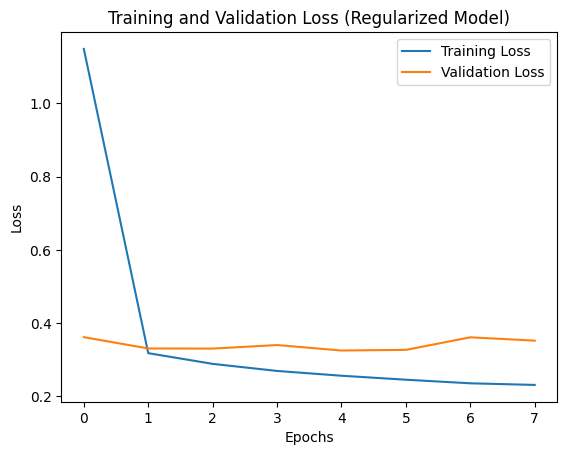

In [31]:
plt.plot(history_regularized.history['loss'], label='Training Loss')
plt.plot(history_regularized.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Regularized Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Example input text for testing
new_review = ["The movie was absolutely amazing, I loved it!"]

# Tokenize the new review
tokenizer = Tokenizer(num_words=5000)
# Fit tokenizer on the original text data (df['review'])
tokenizer.fit_on_texts(df['review'])  # Use the original text data for fitting
new_review_sequence = tokenizer.texts_to_sequences(new_review)

# Pad the sequence to the maximum length used during training
new_review_padded = pad_sequences(new_review_sequence, maxlen=max_len)

print("Padded Sequence:", new_review_padded)



Padded Sequence: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1 296
  363 309]]


In [34]:
# Predict the sentiment
prediction = model_regularized.predict(new_review_padded)

# Interpret the result
if prediction > 0.5:
    sentiment = "Positive"
else:
    sentiment = "Negative"

print(f"Review: {new_review[0]}")
print(f"Predicted Sentiment: {sentiment} (Confidence: {prediction[0][0]:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Review: The movie was absolutely amazing, I loved it!
Predicted Sentiment: Positive (Confidence: 0.77)


In [36]:
# Save the trained model to a file
model_regularized.save("sentiment_analysis_model.h5")
print("Model saved successfully!")


Model saved successfully!
